In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('road_accidents.csv')

In [4]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')
Numerical Columns: Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')


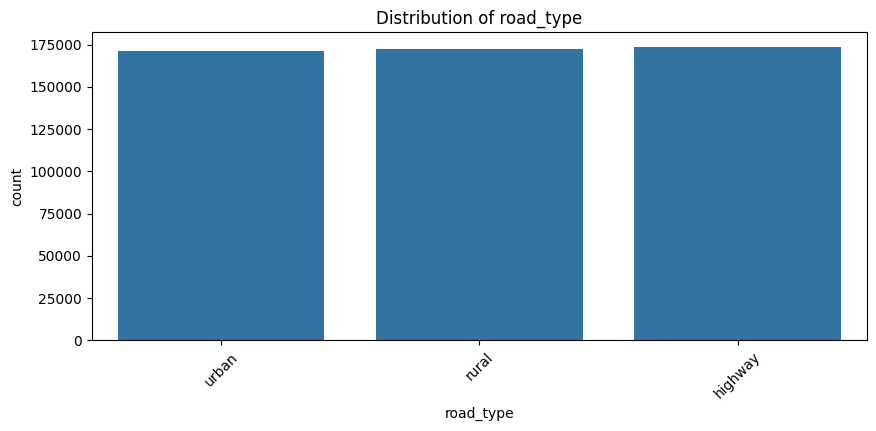

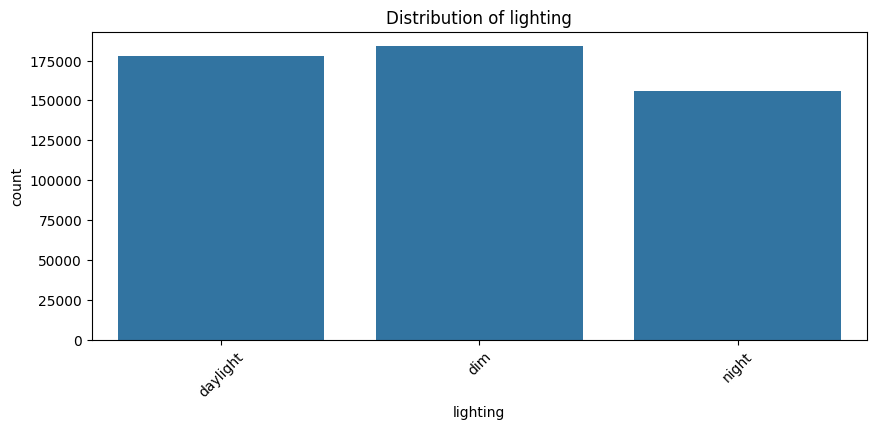

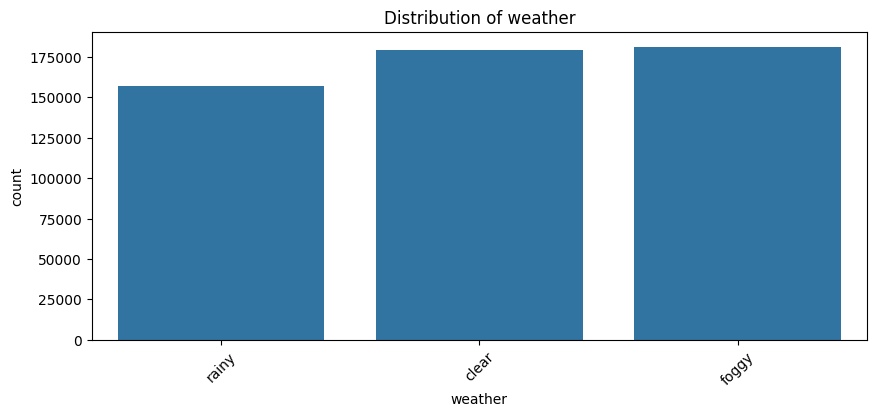

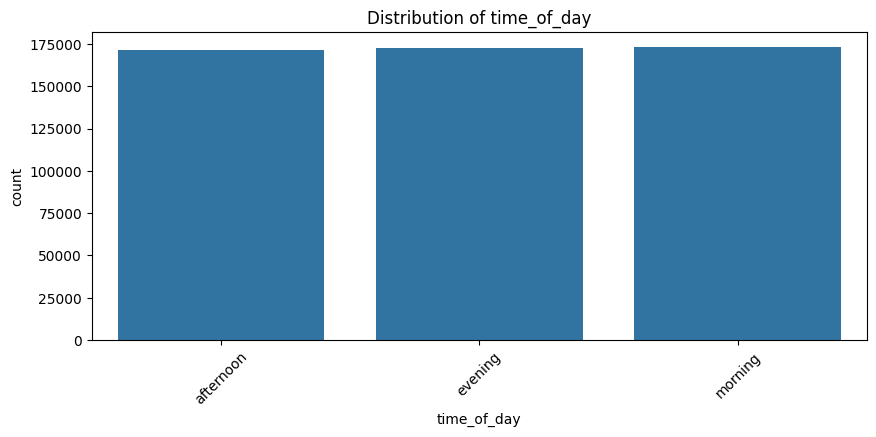

In [8]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
get_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df = pd.concat([df[num_cols], get_dummies], axis=1)

In [10]:
df

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0,2,0.06,35,1,0.13,False,True,False,False,False,True,False,False
1,1,4,0.99,35,0,0.35,False,True,False,False,False,False,True,False
2,2,4,0.63,70,2,0.30,True,False,True,False,False,False,False,True
3,3,4,0.07,35,1,0.21,False,False,True,False,False,True,False,True
4,4,1,0.58,60,1,0.56,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,2,0.32,False,False,False,False,True,False,False,False
517750,517750,4,0.47,35,1,0.26,True,False,False,False,False,True,False,True
517751,517751,4,0.62,25,0,0.19,False,True,False,False,True,False,False,False
517752,517752,3,0.63,25,3,0.51,False,False,False,True,False,False,False,False


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
df

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,-1.732047,-0.438680,-1.572918,-0.703840,-0.209797,-1.336266,False,True,False,False,False,True,False,False
1,-1.732041,1.346344,1.839137,-0.703840,-1.325918,-0.014286,False,True,False,False,False,False,True,False
2,-1.732034,1.346344,0.518342,1.512963,0.906324,-0.314736,True,False,True,False,False,False,False,True
3,-1.732027,1.346344,-1.536229,-0.703840,-0.209797,-0.855546,False,False,True,False,False,True,False,True
4,-1.732021,-1.331192,0.334898,0.879591,-0.209797,1.247605,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,1.732021,1.346344,-1.426163,1.512963,0.906324,-0.194556,False,False,False,False,True,False,False,False
517750,1.732027,1.346344,-0.068678,-0.703840,-0.209797,-0.555096,True,False,False,False,False,True,False,True
517751,1.732034,1.346344,0.481653,-1.337212,-1.325918,-0.975726,False,True,False,False,True,False,False,False
517752,1.732041,0.453832,0.518342,-1.337212,2.022445,0.947155,False,False,False,True,False,False,False,False


Text(0.5, 1.0, 'Correlation Matrix')

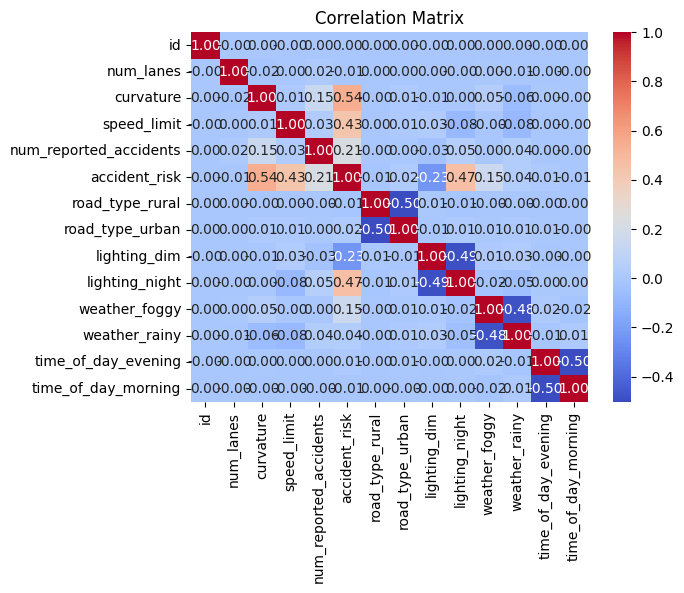

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

In [15]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# ধরে নিচ্ছি df হলো তোমার dataframe
X = df.drop(columns=['accident_risk', 'id'])
y = df['accident_risk']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Model
model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 12
[LightGBM] [Info] Start training from score 0.001370
MAE: 0.2632
R² Score: 0.8848


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {name} Results:")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
evaluate_model(lr, "Linear Regression")



📊 Linear Regression Results:
MAE:  0.3504
RMSE: 0.4418
R²:   0.8042


In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
evaluate_model(ridge, "Ridge Regression")



📊 Ridge Regression Results:
MAE:  0.3504
RMSE: 0.4418
R²:   0.8042


In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
evaluate_model(lasso, "Lasso Regression")



📊 Lasso Regression Results:
MAE:  0.3504
RMSE: 0.4419
R²:   0.8042


In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
evaluate_model(lasso, "Lasso Regression")



📊 Lasso Regression Results:
MAE:  0.3504
RMSE: 0.4419
R²:   0.8042


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
evaluate_model(rf, "Random Forest Regressor")



📊 Random Forest Regressor Results:
MAE:  0.2970
RMSE: 0.3829
R²:   0.8530


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
evaluate_model(gbr, "Gradient Boosting Regressor")



📊 Gradient Boosting Regressor Results:
MAE:  0.2659
RMSE: 0.3418
R²:   0.8828


In [24]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/b8/90/f082b89dd74da8ca27f8a3c7b3e38fc8529a4a14eb2c5b0937c7d66aa922/xgboost-3.1.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
evaluate_model(xgbr, "XGBoost Regressor")



📊 XGBoost Regressor Results:
MAE:  0.2632
RMSE: 0.3390
R²:   0.8847


In [26]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42)
evaluate_model(lgbm, "LightGBM Regressor")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 12
[LightGBM] [Info] Start training from score 0.001370

📊 LightGBM Regressor Results:
MAE:  0.2634
RMSE: 0.3391
R²:   0.8846


In [27]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(128,64), max_iter=300, learning_rate_init=0.001, random_state=42)
evaluate_model(mlp, "Neural Network (MLP Regressor)")



📊 Neural Network (MLP Regressor) Results:
MAE:  0.2663
RMSE: 0.3428
R²:   0.8821


In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
evaluate_model(knn, "KNN Regressor")



📊 KNN Regressor Results:
MAE:  0.2899
RMSE: 0.3734
R²:   0.8602


In [29]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/bd/9e/feae59f6226f742fa3fa30ae126e0941f443d460e7c0fa9f79cdf3ee488f/catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/91/4c/e0ce1ef95d4000ebc1c11801f9b944fa5910ecc15b5e351865763d8657f8/graphviz-0.21-py3-none-any.whl.metadata
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/78/ae/89b45ccccfeebc464c9233de5675990f75241b8ee4cd63227800fdf577d1/plotly-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.15.1 from https://files.pythonhosted.org/packages/47/a9/9e02fa97e421a355fc5e818e9c488080fce04a8e0eebb3ed75a84f041c4a/narwhals-2.10.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB 1.3 MB/s eta 0:01:20
   -------------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [32]:
# === MODELS ===
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Define all models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# === Train, Evaluate & Save Results ===
results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training model: {name}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    print(f"Cross-validation Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")

    # Fit and predict
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    # Save results
    results[name] = {
        "CrossVal_Accuracy_Mean": round(cv_mean, 4),
        "CrossVal_Accuracy_Std": round(cv_std, 4),
        "Test_Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1_Score": round(f1, 4),
        "Confusion_Matrix": cm.tolist()
    }

# === Save all results to JSON ===
with open("model_results.json", "w") as f:
    json.dump(results, f, indent=4)

print("\n✅ All model results saved to 'model_results.json' successfully!")


Training model: Logistic Regression


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML Assigement\Predicting Road Accident Risk\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML Assigement\Predicting Road Accident Risk\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML Assigement\Predicting Road Accident Risk\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1256, in fit
    check_classification_targets(y)
  File "d:\ML Assigement\Predicting Road Accident Risk\venv\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
